Name: Pratham Shewale Roll_no: TEBD22618

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Use the Seaborn library to see if we can find any patterns in the data.

<Axes: xlabel='sex', ylabel='age'>

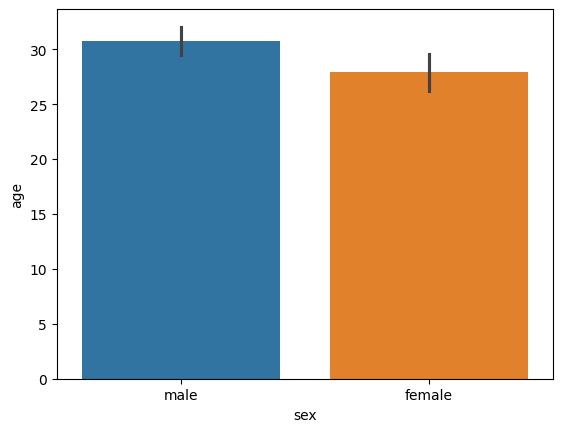

In [16]:
sns.barplot(x="sex", y="age", hue="sex", data = titanic)

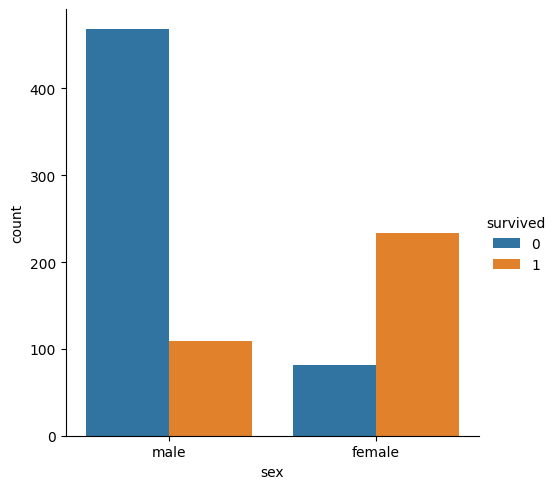

In [17]:
sns.catplot(x="sex", hue="survived", kind="count", data = titanic)

2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

<Axes: xlabel='fare', ylabel='Count'>

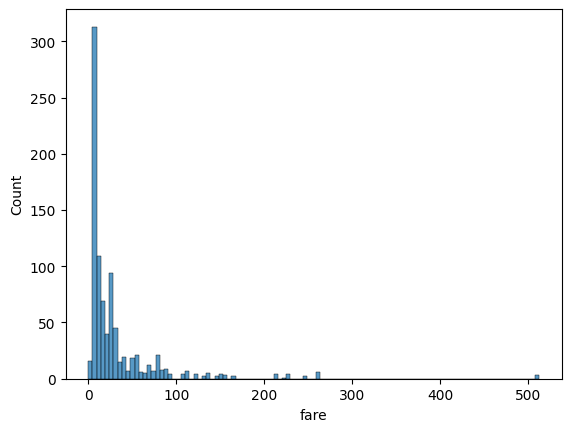

In [18]:
sns.histplot(data = titanic, x = "fare")

<Axes: xlabel='fare', ylabel='Count'>

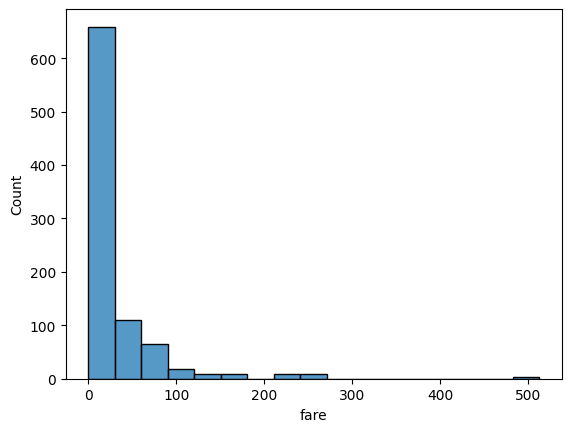

In [19]:
sns.histplot(data = titanic, x = "fare", binwidth = 30)

It is seen that large number of passengers (600+) paid lowest fare (0-30 units). The distribution is skewed right, with fewer passengers paying high fares.

In [20]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (714, 15)

Final cleaned data shape: (436, 15)


In [21]:
print(outliers_dict.keys())

dict_keys(['age', 'sibsp', 'parch', 'fare'])


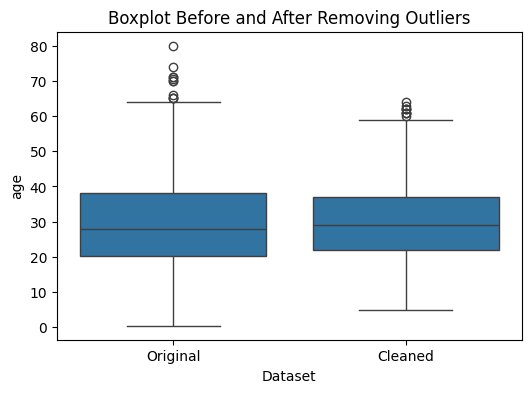

In [22]:
plot_df = pd.DataFrame({
    'age': pd.concat([
        df['age'],  # original
        df_clean['age'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='age', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()
